# Esiste una correlazione tra età e valore complessivo del calciatore?

Quello che faremo:
- Breve analisi del dataset
- Creazione di un sottodataset con i calciatori italiani
- Raggruppamento di dati con groupby
- Studio della correlazione tra età e valore a livello matematico (pd.corr) e a livello visivo con (scatterplot,lineplot)
- Creazione di un dataframe con unione di  due colonne (join)
- Ordinamento di un dataframe con sort_values

In [1]:
import pandas as pd
data= pd.read_csv("fifa_data.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
data.shape

(18207, 85)

# Diamo un'occhiata ai dati

In [3]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [5]:
data.isnull().mean().head(30)

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        0.013237
Value                       0.000000
Wage                        0.000000
Special                     0.000000
Preferred Foot              0.002636
International Reputation    0.002636
Weak Foot                   0.002636
Skill Moves                 0.002636
Work Rate                   0.002636
Body Type                   0.002636
Real Face                   0.002636
Position                    0.003295
Jersey Number               0.003295
Joined                      0.085297
Loaned From                 0.930576
Contract Valid Until        0.015873
Height                      0.002636
Weight                      0.002636
LS                          0.114516
ST                          0.114516
RS                          0.114516
L

In [6]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# Selezioniamo un sotto dataset

In [7]:
Italy=data[data["Nationality"]=="Italy"]

In [9]:
Italy.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
24,138956,G. Chiellini,33,Italy,89,89,Juventus,€27M,€215K,1841,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
29,198219,L. Insigne,27,Italy,88,88,Napoli,€62M,€165K,2017,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,€4M,€77K,1334,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
48,192387,C. Immobile,28,Italy,87,87,Lazio,€52M,€115K,2009,...,81.0,34.0,33.0,32.0,6.0,8.0,15.0,12.0,6.0,€88.4M
63,199556,M. Verratti,25,Italy,86,89,Paris Saint-Germain,€55M,€135K,2149,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M


# Correlazione e Grafici

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data[["Age","Overall"]].corr(method ="pearson")

,Age,Overall
Age,1.00000,0.45235
Overall,0.45235,1.00000


In [11]:
Italy[["Age","Overall"]].corr(method ="pearson")

,Age,Overall
Age,1.000000,0.434048
Overall,0.434048,1.000000


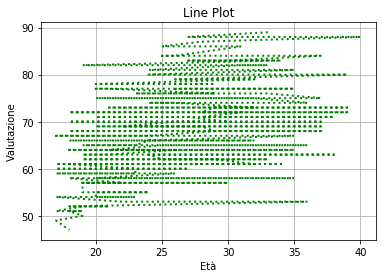

In [14]:
plt.plot(Italy["Age"],Italy["Overall"],color='g',linestyle=':',linewidth=2)

plt.title("Line Plot")
plt.xlabel("Età")
plt.ylabel("Valutazione")
plt.grid(True)
plt.show()

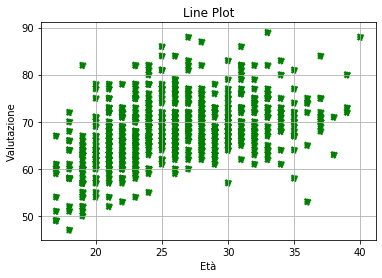

In [15]:
plt.scatter(Italy["Age"],Italy["Overall"],color='g',linestyle=':',linewidth=2)

plt.title("Line Plot")
plt.xlabel("Età")
plt.ylabel("Valutazione")
plt.grid(True)
plt.show()

# Raggruppiamo per Età

In [16]:
valore=Italy.groupby(by= "Age",sort = True)["Overall"].mean()

In [17]:
valore

Age
17    56.666667
18    60.812500
19    60.000000
20    63.969697
21    65.156863
22    65.916667
23    67.245283
24    69.592593
25    70.311111
26    69.225806
27    71.538462
28    70.211538
29    68.000000
30    69.390244
31    72.636364
32    70.370370
33    71.761905
34    71.285714
35    69.800000
36    68.833333
37    72.500000
38    67.000000
39    75.000000
40    88.000000
Name: Overall, dtype: float64

In [18]:
eta= Italy.groupby(by= "Age",sort= True)["Age"].mean()

In [19]:
print(valore)
print(eta)

Age
17    56.666667
18    60.812500
19    60.000000
20    63.969697
21    65.156863
22    65.916667
23    67.245283
24    69.592593
25    70.311111
26    69.225806
27    71.538462
28    70.211538
29    68.000000
30    69.390244
31    72.636364
32    70.370370
33    71.761905
34    71.285714
35    69.800000
36    68.833333
37    72.500000
38    67.000000
39    75.000000
40    88.000000
Name: Overall, dtype: float64
Age
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
Name: Age, dtype: int64


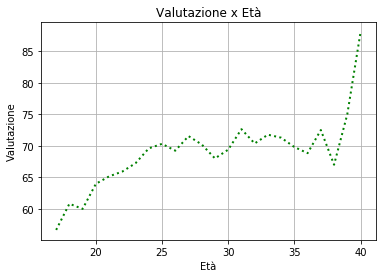

In [20]:
plt.plot(eta,valore,color='g',linestyle=':',linewidth=2)

plt.title("Valutazione x Età")
plt.xlabel("Età")
plt.ylabel("Valutazione")
plt.grid(True)
plt.show()

In [21]:
conta=Italy.groupby(by= "Age",sort = True).Name.count()
conta

Age
17     9
18    16
19    36
20    33
21    51
22    48
23    53
24    54
25    45
26    62
27    39
28    52
29    31
30    41
31    33
32    27
33    21
34    14
35    15
36     6
37    10
38     2
39     3
40     1
Name: Name, dtype: int64

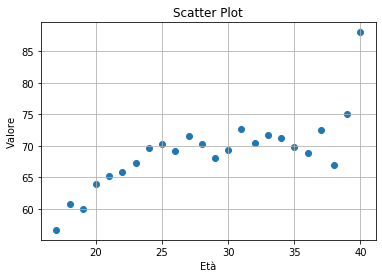

In [22]:
plt.scatter(eta,valore)
plt.title("Scatter Plot")
plt.xlabel("Età")
plt.ylabel("Valore")
plt.grid(True)
plt.show()

# Unione di Series in un Dataframe ordinato

In [23]:
valore_eta=pd.DataFrame(eta)
valore_eta=valore_eta.join(valore)
valore_eta

,Age,Overall
Age,,
17,17,56.666667
18,18,60.812500
19,19,60.000000
20,20,63.969697
21,21,65.156863
22,22,65.916667
23,23,67.245283
24,24,69.592593
25,25,70.311111


In [24]:
valore_eta=valore_eta.join(conta)
valore_eta.columns=["Age","Overall","Count"]
valore_eta

,Age,Overall,Count
Age,,,
17,17,56.666667,9
18,18,60.812500,16
19,19,60.000000,36
20,20,63.969697,33
21,21,65.156863,51
22,22,65.916667,48
23,23,67.245283,53
24,24,69.592593,54
25,25,70.311111,45


In [28]:
Italy[["Name","Age","Overall"]].sort_values(by="Age",ascending= False).tail(10)

,Name,Age,Overall
18194,J. Milli,18,47
15728,G. Azzinnari,17,59
15272,V. Millico,17,60
17517,D. Ojo,17,54
14922,M. Viviani,17,60
17935,S. Sarri,17,51
14011,E. Vignato,17,61
7758,P. Pellegri,17,67
18122,G. Figliuzzi,17,49
18134,F. Ranocchia,17,49
